#### Download the data 

In [ ]:
!pip install yfinance statsmodels --quiet

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as ss
import statsmodels.api as sm

In [ ]:
preliminary_stocks = yf.download(
    tickers=['SBER.ME' , 'VTBR.ME','CBOM.ME', 'MOEX.ME','AFKS.ME','LKOH.ME',
             'ROSN.ME','TATN.ME','NVTK.ME','GAZP.ME','SNGS.ME', 'GMKN.ME', 
             'NLMK.ME','CHMF.ME','MAGN.ME','POLY.ME','RUAL.ME','MTLR.ME', 
             'AFLT.ME','IRAO.ME','PHOR.ME','MTSS.ME','FIVE.ME','DSKY.ME','BZ=F'],
    start='2016-01-01',
    end='2022-01-01',
)

[*********************100%***********************]  25 of 25 completed


In [ ]:
preliminary_stocks = preliminary_stocks['Adj Close']

### Pick the most liquid assets for the portfolio

In [ ]:
plt.figure(figsize=(15, 15))
heat = preliminary_stocks.corr()
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, cbar=False)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45)
plt.title('Corrmap of the most liquid assets', fontsize=12, weight='bold')
plt.show()

In [ ]:
# Portfolio composition
df_stocks_fx = yf.download(
    tickers=['GAZP.ME' , 'GMKN.ME' , 'SBER.ME' , 'CBOM.ME' , 'VTBR.ME' , 'AFLT.ME',
     'MOEX.ME' , 'AFKS.ME' , 'POLY.ME' , 'IRAO.ME','EURRUB=X','CHF=X'],
    start='2016-01-01',
    end='2022-01-01',
)

[*********************100%***********************]  12 of 12 completed


In [ ]:
print(df_stocks_fx.shape)
df_stocks_fx = df_stocks_fx['Adj Close'] # take Adj Close
df_stocks_fx.head()

(1566, 72)


,AFKS.ME,AFLT.ME,CBOM.ME,CHF=X,EURRUB=X,GAZP.ME,GMKN.ME,IRAO.ME,MOEX.ME,POLY.ME,SBER.ME,VTBR.ME
Date,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,1.00136,79.853951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,14.237408,47.688725,3.857031,0.99950,76.557198,92.541252,5288.928711,1.008576,61.062721,610.970337,58.208652,0.062179
2016-01-05,14.616752,46.203754,3.793237,1.00242,78.535202,93.597603,5385.554199,1.122190,62.691513,618.439453,58.731285,0.060673
2016-01-06,14.604645,45.864334,3.812866,1.00840,78.630898,93.247772,5329.238770,1.164846,62.784584,622.422791,57.519707,0.060552
2016-01-07,NaN,NaN,NaN,1.00739,80.083603,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot the data

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 12), dpi=150)

for i in range(3):
    for j in range(4):
        if j == 0:
            ax[i][j].set_ylabel('Value', fontsize=14)
        ax[i][j].plot(df_stocks_fx[df_stocks_fx.columns[i*4 + j]])
        ax[i][j].set_title(df_stocks_fx.columns[i*4 + j], fontsize=14)
plt.suptitle('Visualised prices', fontsize=18, weight="bold")
fig.tight_layout(h_pad=3)
fig.show()

In [ ]:
plt.figure(figsize=(10, 10))
heat = df_stocks_fx.corr()
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, cbar=False)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45)
plt.title('Correlations of the nvestment portfolio assets', fontsize=12, weight='bold')
plt.show()

### Download risk factors

In [ ]:
df_risk_factors = yf.download(
    tickers=['IMOEX.ME','BZ=F','USDRUB=X'],
    start='2016-01-01',
    end='2022-01-01',
) 

df_risk_factors = df_risk_factors['Adj Close']

df_risk_factors.loc['2016-01-06', 'USDRUB=X'] *= 100 # Correct the anomaly 

[*********************100%***********************]  3 of 3 completed


In [ ]:
df_risk_factors.head(3)

,BZ=F,IMOEX.ME,USDRUB=X
Date,,,
2016-01-01,NaN,NaN,73.230003
2016-01-04,37.220001,1734.560059,73.400002
2016-01-05,36.419998,1754.130005,73.122498


In [ ]:
df_risk_factors = df_risk_factors.join(rts['Price'], how='left')
df_risk_factors = df_risk_factors.rename(columns={'Price': 'RTS'})

In [ ]:
df_risk_factors.head(5)

,BZ=F,IMOEX.ME,USDRUB=X,RTS
Date,,,,
2016-01-01,NaN,NaN,73.230003,NaN
2016-01-04,37.220001,1734.560059,73.400002,749.28
2016-01-05,36.419998,1754.130005,73.122498,752.70
2016-01-06,34.230000,1748.569946,71.619999,736.82
2016-01-07,33.750000,NaN,74.595001,NaN


### Plot the data

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
        if i == 0:
            ax[i].set_ylabel('Value', fontsize=14)
        ax[i].plot(df_risk_factors[df_risk_factors.columns[i]])
        ax[i].set_title(df_risk_factors.columns[i], fontsize=14)

plt.suptitle('Risk factors', fontsize=18, weight="bold")
fig.tight_layout()
fig.show()

In [ ]:
df_risk_factors.shape, df_risk_factors.isna().sum()

((1566, 4),
 BZ=F        61
 IMOEX.ME    73
 USDRUB=X     3
 RTS         56
 dtype: int64)

### Correlations between  risk factors and assets

In [ ]:
plt.figure(figsize=(5, 5))
heat = df_risk_factors.corr()
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, cbar=False)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45)
plt.title('Corrmap risk factors vs assets', fontsize=12, weight='bold')
plt.show()

#### Download data for bonds


In [ ]:
!pip install openpyxl 

     |████████████████████████████████| 242 kB 18.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
bonds_df = pd.concat(bonds_df_lst, ignore_index=False, axis=1)
bonds_df.sort_index(inplace=True)
bonds_df.head(5)

,Price0,Price1,Price2,Price3,Price4
Date,,,,,
2016-01-04,87.3998,77.2498,86.7400,91.8999,83.9998
2016-01-05,87.6996,77.4480,87.1764,91.9995,84.1000
2016-01-06,87.6999,77.9910,86.6000,91.5999,83.7494
2016-01-11,85.5007,76.9900,84.2500,89.2999,80.8000
2016-01-12,84.1501,76.0000,83.5001,87.8001,79.6579


In [ ]:
bonds_df.isna().sum()

Price0    0.00264
Price1    0.00000
Price2    0.00066
Price3    0.00000
Price4    0.00000
dtype: float64

#### Visualise the data for bonds 

In [ ]:
plt.figure(figsize=(15, 7), dpi=100)
for bond in bonds_df.columns:
    plt.plot(bonds_df[bond], label=bond)

plt.xlabel('Date')
plt.ylabel('Price, %')
plt.legend()
plt.show()

#### Load data on risk factors for government bonds - zero-coupon yield curve for government bonds

In [ ]:
df_risk_factors_bonds = pd.read_csv('cbr_rates.csv', 
            parse_dates=[['tradedate', 'tradetime']], skiprows=2, sep=';')

df_risk_factors_bonds = df_risk_factors_bonds.rename(columns={'tradedate_tradetime': 'datetime'})
df_risk_factors_bonds = df_risk_factors_bonds[df_risk_factors_bonds['datetime'].between('2016-01-01', '2022-01-01')]
df_risk_factors_bonds.head()

,datetime,period_0.25,period_0.5,period_0.75,period_1.0,period_2.0,period_3.0,period_5.0,period_7.0,period_10.0,period_15.0,period_20.0,period_30.0
500,2016-04-01 18:38:18,"8,77","9,34","9,7","9,91","10,07","9,97","9,8","9,67","9,51","9,39","9,35","9,34"
501,2016-05-01 18:39:52,"8,63","9,23","9,6","9,81","10,0","9,92","9,74","9,61","9,5","9,42","9,4","9,39"
502,2016-06-01 18:30:27,"8,65","9,24","9,61","9,84","10,09","10,02","9,85","9,74","9,61","9,5","9,46","9,44"
503,2016-11-01 18:39:51,"9,67","10,29","10,55","10,64","10,52","10,42","10,35","10,26","10,06","9,95","9,93","9,92"
504,2016-12-01 18:39:51,"9,7","10,33","10,62","10,74","10,65","10,54","10,46","10,39","10,24","10,14","10,11","10,1"


In [ ]:
df_risk_factors_bonds = df_risk_factors_bonds.set_index('datetime')
df_risk_factors_bonds = df_risk_factors_bonds.replace(',',  '.', regex=True)
df_risk_factors_bonds = df_risk_factors_bonds.astype('float')
df_risk_factors_bonds = df_risk_factors_bonds.sort_index()

In [ ]:
df_risk_factors_bonds.head()

,period_0.25,period_0.5,period_0.75,period_1.0,period_2.0,period_3.0,period_5.0,period_7.0,period_10.0,period_15.0,period_20.0,period_30.0
datetime,,,,,,,,,,,,
2016-01-02 18:38:47,9.03,9.62,9.93,10.10,10.29,10.35,10.38,10.35,10.28,10.24,10.24,10.26
2016-01-03 18:37:01,9.04,9.34,9.44,9.47,9.48,9.49,9.45,9.38,9.29,9.26,9.26,9.27
2016-01-04 18:39:17,9.76,9.90,9.91,9.84,9.47,9.30,9.19,9.15,9.11,9.06,9.03,9.00
2016-01-06 18:39:47,10.13,10.01,9.89,9.80,9.55,9.43,9.23,9.07,8.92,8.83,8.81,8.79
2016-01-07 18:39:49,10.14,9.97,9.81,9.66,9.21,8.91,8.50,8.29,8.20,8.24,8.30,8.36


### Visualize risk factor data for bonds - zero-coupon yield curve of government bonds

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 12), dpi=150)

for i in range(3):
    for j in range(4):
        if j == 0:
            ax[i][j].set_ylabel('Value', fontsize=14)
        ax[i][j].plot(df_risk_factors_bonds.sort_index()[df_risk_factors_bonds.columns[i*4 + j]])
        ax[i][j].set_title(df_risk_factors_bonds.columns[i*4 + j], fontsize=14)
plt.suptitle('Interest rate charts', fontsize=18, weight="bold")
fig.tight_layout(h_pad=3)
fig.show()

### Conduct a primary analysis of data on the constituents of the portfolio (stocks, fx pairs, government bonds) and risk factors (MOEX, RTS indices, Brent oil, interest rates)

In [ ]:
plt.figure(figsize=(12, 12))
heat = pd.concat([df_stocks_fx, df_risk_factors[['BZ=F', 'IMOEX.ME', 'RTS', 'USDRUB=X']]], 
                    axis=1).corr()
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, cbar=False)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45)
plt.title('Heatmap equities vs risk factors', fontsize=12, weight='bold')
plt.show()

In [ ]:
df_risk_factors.drop(columns=['RTS'], inplace=True)

In [ ]:
df_risk_factors_bonds_heat = df_risk_factors_bonds.copy()
df_risk_factors_bonds_heat.index = df_risk_factors_bonds_heat.index.date
df_risk_factors_bonds_heat

,period_0.25,period_0.5,period_0.75,period_1.0,period_2.0,period_3.0,period_5.0,period_7.0,period_10.0,period_15.0,period_20.0,period_30.0
2016-01-02,9.03,9.62,9.93,10.10,10.29,10.35,10.38,10.35,10.28,10.24,10.24,10.26
2016-01-03,9.04,9.34,9.44,9.47,9.48,9.49,9.45,9.38,9.29,9.26,9.26,9.27
2016-01-04,9.76,9.90,9.91,9.84,9.47,9.30,9.19,9.15,9.11,9.06,9.03,9.00
2016-01-06,10.13,10.01,9.89,9.80,9.55,9.43,9.23,9.07,8.92,8.83,8.81,8.79
2016-01-07,10.14,9.97,9.81,9.66,9.21,8.91,8.50,8.29,8.20,8.24,8.30,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,7.30,7.69,7.95,8.11,8.36,8.40,8.44,8.46,8.46,8.46,8.46,8.47
2021-12-27,7.39,7.75,7.99,8.15,8.41,8.46,8.48,8.48,8.45,8.44,8.44,8.45
2021-12-28,7.45,7.80,8.02,8.17,8.39,8.43,8.46,8.47,8.45,8.44,8.44,8.44
2021-12-29,7.52,7.87,8.09,8.23,8.44,8.47,8.48,8.47,8.45,8.44,8.44,8.45


In [ ]:
df_risk_factors_bonds.shape, bonds_df.shape

((1515, 12), (1515, 5))

### Let's look at the correlation between the components of the zero-coupon yield curve

In [ ]:
plt.figure(figsize=(12, 12))
heat = df_risk_factors_bonds.corr()
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, 
            annot_kws={'fontsize': 8}, cbar=False)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45)
plt.title('Heatmap for the zero-coupon yield curve', fontsize=12, weight='bold')
plt.show()

### The relationship between bond prices and their risk factors

In [ ]:
plt.figure(figsize=(12, 12))
heat = df_risk_factors_bonds_heat.join(bonds_df, how='left').corr() 
heat = heat.loc[bonds_df.columns, df_risk_factors_bonds.columns]
sns.heatmap(heat, annot=True, square=True, cmap='coolwarm', linewidths=0.9, cbar=False, center=-0.75)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45)
plt.title('Heatmap bonds vs rates ', fontsize=12, weight='bold')
plt.show()

### For further analysis, let's move from prices to returns/differences

In [ ]:
df_stocks_fx_returns = df_stocks_fx.pct_change() # returns - better for equities
bonds_df_returns = bonds_df.diff() # diff - better for bonds

df_risk_factors_returns = df_risk_factors.pct_change()
df_risk_factors_bonds_returns = df_risk_factors_bonds.diff()

### Check for stationarity

#### Bonds

In [ ]:
for col_name in list(df_risk_factors_bonds_returns.columns):
    test = sm.tsa.adfuller(df_risk_factors_bonds_returns[col_name].dropna())
    print(col_name)
    print('\t adf: ', test[0]) 
    print('\t p-value: ', test[1])
    print('\t Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print('\t has unit roots, the series is not stationary')
    else:
        print('\t has unit roots, the series is  stationary')

We draw a conclusion about the stationarity (according to the results of visual analysis of graphs and analysis of the Dickey-Fuller test) of series of interest rates on bonds.

In [ ]:
df_risk_factors_bonds_returns.dropna(inplace=True)
params_normal_distribution = ss.norm.fit(df_risk_factors_bonds_returns)
print(params_normal_distribution)

fig, ax = plt.subplots(len(list(df_risk_factors_bonds_returns.columns)), 1, figsize=(8, 36))
for i, el in enumerate(list(df_risk_factors_bonds_returns.columns)):
    ss.probplot(df_risk_factors_bonds_returns[el], dist=ss.norm(*params_normal_distribution), plot=ax[i])
    ax[i].set_title(el, fontsize=12)
    
plt.suptitle(' Q-Q Plots for rates', fontsize=14)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.96,
                    hspace=0.3, wspace=0.25)
fig.show()

### Risk factors for equities  

In [ ]:
df_risk_factors_returns.dropna(inplace=True)
params_normal_distribution = ss.norm.fit(df_risk_factors_returns)
print(params_normal_distribution)

(0.0004787774991931508, 0.01719122553095919)


In [ ]:
fig, ax = plt.subplots(len(list(df_risk_factors_returns.columns)), 1, figsize=(8, 12))
for i, el in enumerate(list(df_risk_factors_returns.columns)):
    ss.probplot(df_risk_factors_returns[el], dist=ss.norm(*params_normal_distribution), plot=ax[i])
    ax[i].set_title(el, fontsize=12)
    
plt.suptitle('Q-Q plots for risk factors', fontsize=14)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.92,
                    hspace=0.3, wspace=0.25)
fig.show()

In [ ]:
for col_name in list(df_risk_factors_returns.columns):
    test = sm.tsa.adfuller(df_risk_factors_returns[col_name])
    print(col_name)
    print('\t adf: ', test[0]) 
    print('\t p-value: ', test[1])
    print('\t Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print('\t has unit roots, the series is not stationary')
    else:
        print('\t has unit roots, the series is  stationary')

Based on our visual analysis of the charts and the results of the Dickey-Fuller test, we have determined the stationarity of the series of stock risk factors.

#### Let's decompose risk factors into trend and seasonality to see the presence of these components

In [ ]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def prepare_for_decomposition(df):
    """
    Clean data and prepare to ARIMA
    """
    df = df.copy()
    df = df.dropna()
    df = df.sort_index()

    # extrapolate on holidays and weekends
    full_date_range = pd.date_range(df.index.min(), df.index.max(), freq='1D')
    tmp = pd.DataFrame(index=full_date_range)
    tmp = tmp.join(df)
    tmp = tmp.fillna(method='ffill', axis=0)
    return tmp

df_index_extrapolated = prepare_for_decomposition(df_risk_factors)

In [ ]:
df_index_extrapolated.columns

Index(['BZ=F', 'IMOEX.ME', 'USDRUB=X'], dtype='object')

In [ ]:
df_index_extrapolated.shape, df_risk_factors.shape

((2188, 3), (1566, 3))

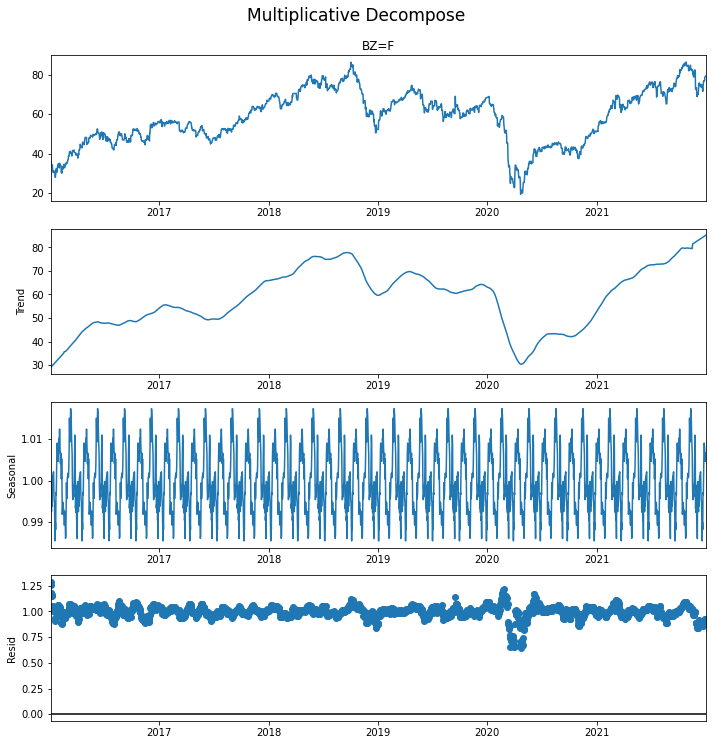

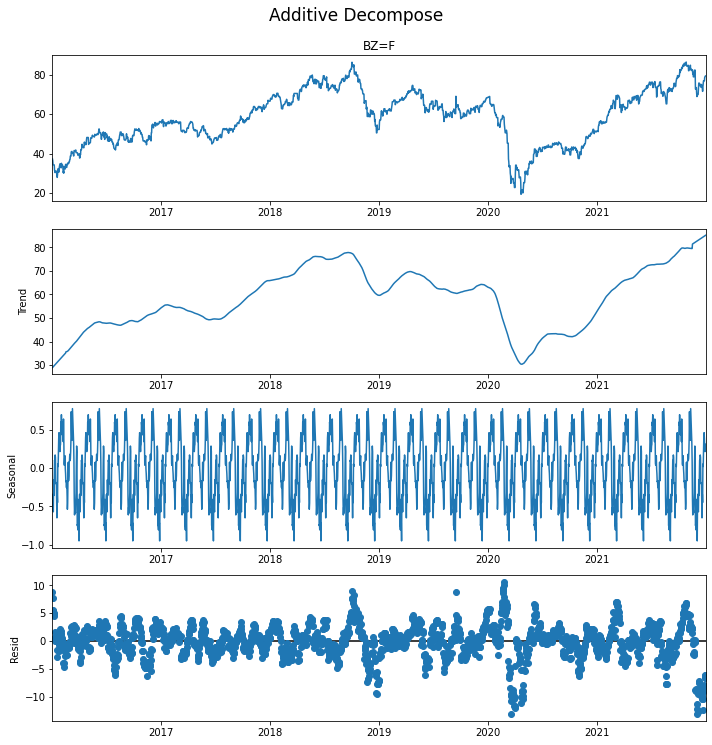

In [ ]:
# Multiplicative Decomposition for Brent
result_mul = seasonal_decompose(df_index_extrapolated['BZ=F'], model='multiplicative', 
                                extrapolate_trend='freq', period=90)

# Additive Decomposition
result_add = seasonal_decompose(df_index_extrapolated['BZ=F'], model='additive', 
                                extrapolate_trend='freq', period=90)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=17, y=1.03)
result_add.plot().suptitle('Additive Decompose', fontsize=17, y=1.03)
plt.show()

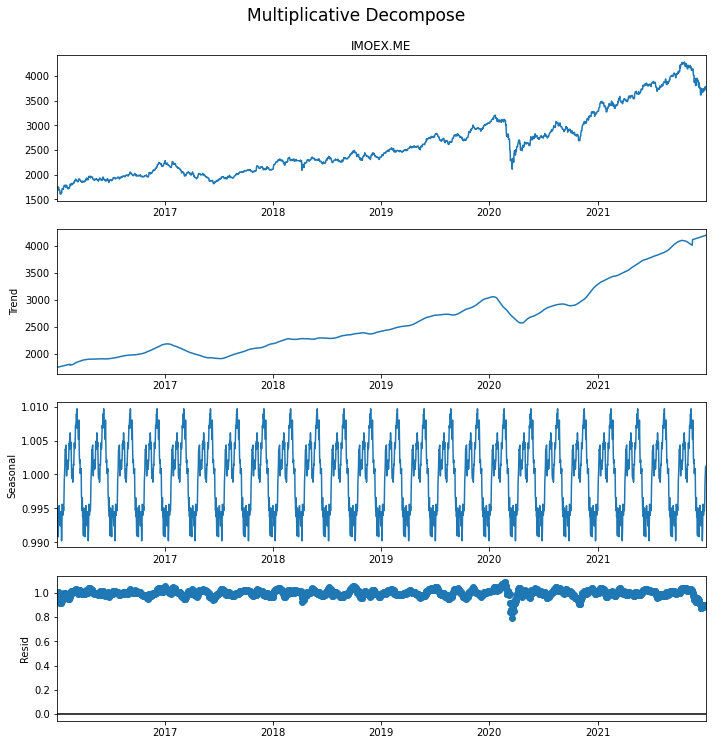

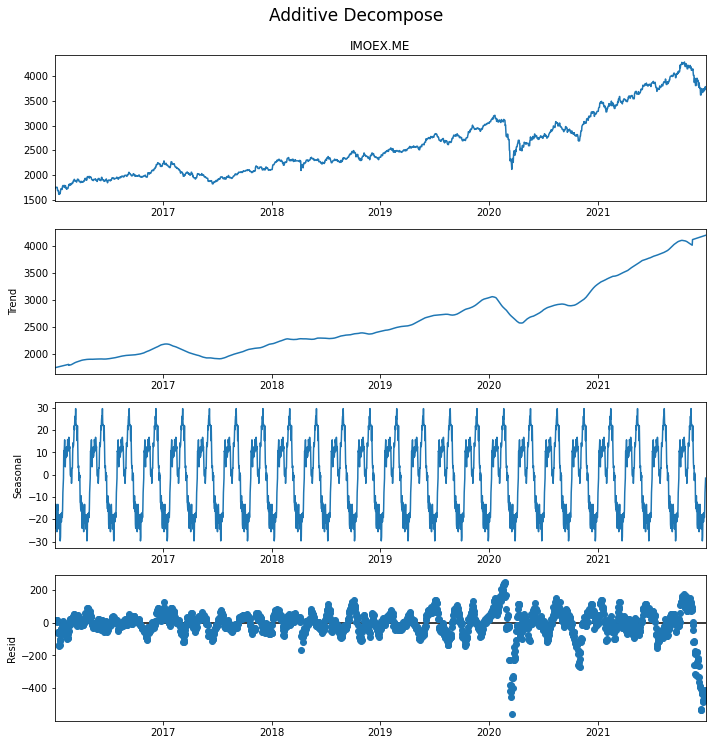

In [ ]:

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_index_extrapolated['IMOEX.ME'], model='multiplicative', 
                                extrapolate_trend='freq', period=90)

# Additive Decomposition
result_add = seasonal_decompose(df_index_extrapolated['IMOEX.ME'], model='additive', 
                                extrapolate_trend='freq', period=90)

# Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=17, y=1.03)
result_add.plot().suptitle('Additive Decompose', fontsize=17, y=1.03)
plt.show()

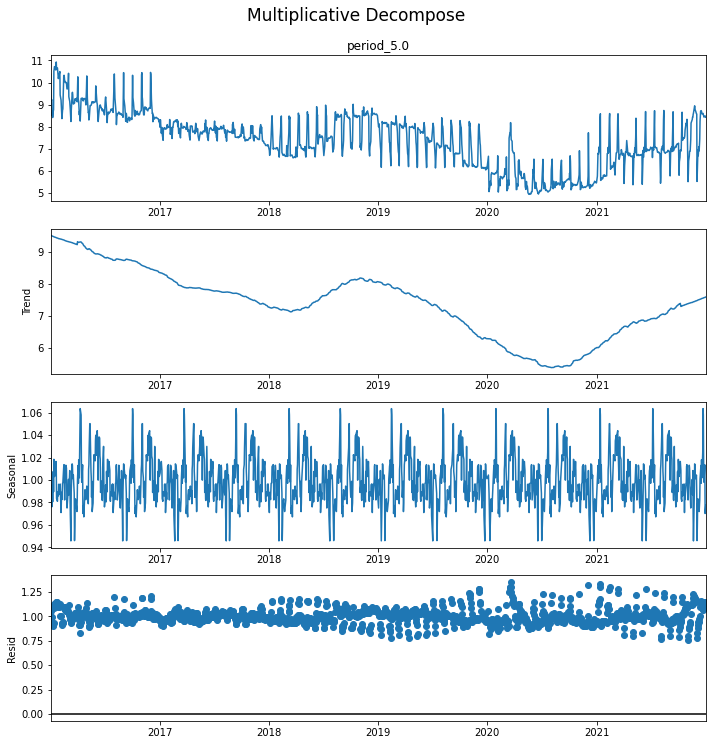

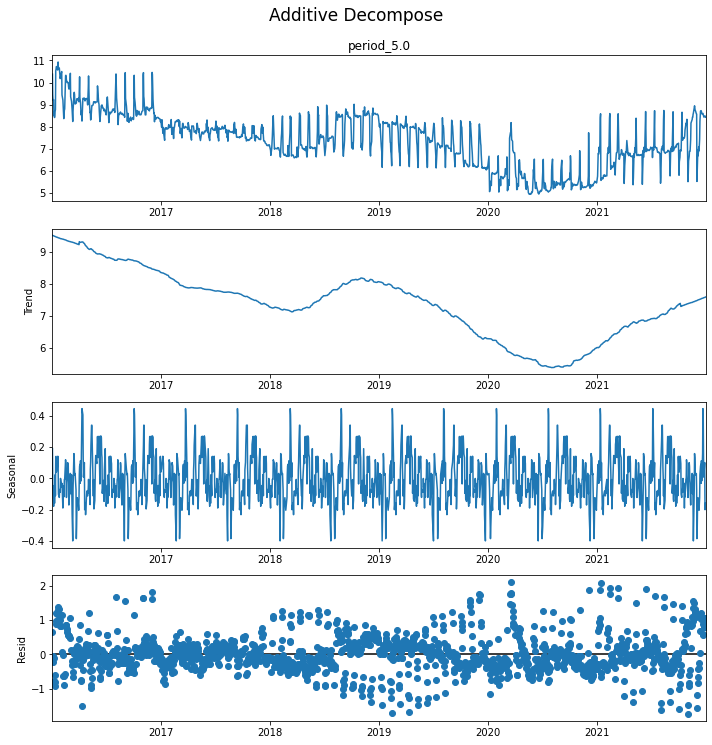

In [ ]:
# Multiplicative Decomposition for zero-coupon bonds
result_mul = seasonal_decompose(df_risk_factors_bonds['period_5.0'], model='multiplicative', 
                                extrapolate_trend='freq', period=120)

# Additive Decomposition
result_add = seasonal_decompose(df_risk_factors_bonds['period_5.0'], model='additive', 
                                extrapolate_trend='freq', period=120)

# Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=17, y=1.03)
result_add.plot().suptitle('Additive Decompose', fontsize=17, y=1.03)
plt.show()

### To reduce the number of risk factors in a bond portfolio, we can focus on the zero-coupon yield curve.

Interest rates play a crucial role as risk factors, and each term has its own rate, making them individual risk factors. However, these rates are correlated with each other. When rates for different terms change simultaneously, they often change by similar amounts. This correlation allows us to approximate the rates across various terms and reduce the number of individual risk factors. For instance, we can consider the rates for 7, 8, and 9 years as a group and assume that they change by the same proportion.

By applying this approximation technique to the entire yield curve, we can effectively reduce the number of risk factors associated with the bond portfolio.

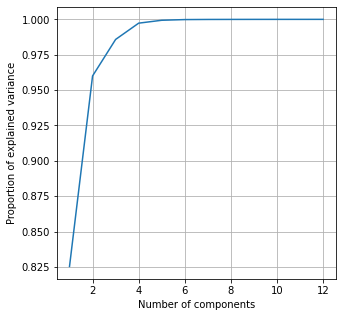

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_risk_factors_bonds_returns)

plt.figure(figsize=(5,5))
plt.plot(np.arange(1, len(pca.components_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Proportion of explained variance")
plt.grid()
plt.show()

In [ ]:
K = 2 #the number of components 

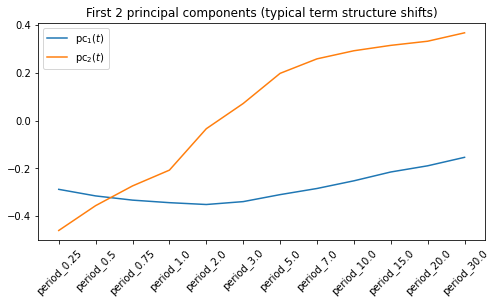

In [ ]:
pca = PCA(n_components=K).fit(df_risk_factors_bonds_returns)
factors = pca.transform(df_risk_factors_bonds_returns)
plt.figure(figsize=(8, 4))
plt.plot(df_risk_factors_bonds_returns.columns, pca.components_.T)
plt.legend([f"pc$_{i}(t)$" for i in range(1, K+1)])
plt.title(f'First {K} principal components (typical term structure shifts)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
factors.shape, df_risk_factors_bonds_returns.shape

((1514, 2), (1514, 12))

In [ ]:
pca.components_.shape

(2, 12)

In [ ]:
A = pd.DataFrame(pca.components_, columns=df_risk_factors_bonds_returns.columns)
print(A.T)

                    0         1
period_0.25 -0.288418 -0.460817
period_0.5  -0.315975 -0.356681
period_0.75 -0.333621 -0.274064
period_1.0  -0.344267 -0.207926
period_2.0  -0.351962 -0.034374
period_3.0  -0.339850  0.071319
period_5.0  -0.310558  0.197604
period_7.0  -0.284840  0.258368
period_10.0 -0.252703  0.292305
period_15.0 -0.215697  0.314875
period_20.0 -0.189776  0.332240
period_30.0 -0.154267  0.367479


In [ ]:
# PCA factors are independent by construction
factor_covariance = pd.DataFrame(np.diag(pca.explained_variance_))
factor_covariance

,0,1
0,1.780288,0.000000
1,0.000000,0.290444


In [ ]:
term_structure_covariance = rate_sensitivities @ factor_covariance @ rate_sensitivities.T
# Now we distribute the unexplained variance evenly across all rates
# noise_variance_ is already the average
additional_variance = np.eye(pca.n_features_) * pca.noise_variance_ 
term_structure_covariance += additional_variance
# cov(Δr)
term_structure_covariance

In [ ]:
display(rate_sensitivities @ factor_covariance @ rate_sensitivities.T)

In [ ]:
np.eye(pca.n_features_) * pca.noise_variance_ 

In [ ]:
# Assets
bonds_df.to_csv('vars/bonds_df.csv')
df_stocks_fx.to_csv('vars/df_stocks_fx.csv')

# Risk Factors
df_risk_factors_bonds.to_csv('vars/df_risk_factors_bonds.csv')
df_risk_factors.to_csv('vars/df_risk_factors.csv')

### Selection of Models to Describe Risk Factors (Based on Previous Analysis)

Based on the descriptive statistics conducted in the previous paragraph, it appears that the time series of risk factors exhibit heteroscedasticity, indicating non-stationary dispersion. In order to accurately describe these risk factors, we need to select appropriate models. 

1. Choose a dynamics model for each risk factor, ensuring proper justification and critical evaluation of the chosen model.
   a. Take into consideration the descriptive statistics derived from the previous analysis.
   b. If necessary, estimate the model parameters using the available historical data.

To model the distribution of risk factors for future periods, you can consider the following approaches:

1. Non-parametric approach: Utilize historical data to estimate the distribution without making specific assumptions about its shape or parameters.

2. Parametric approach: Employ a specific distribution model (e.g., normal distribution, log-normal distribution) based on assumptions about the underlying data. This approach involves estimating the parameters of the chosen distribution.

3. Model approach: Consider employing ARCH (Autoregressive Conditional Heteroscedasticity) or GARCH (Generalized Autoregressive Conditional Heteroscedasticity) models. These models capture the time-varying volatility and allow for better representation of the risk factors' dynamics.

By carefully selecting and justifying the appropriate models, taking into account the descriptive statistics obtained, we can effectively describe the risk factors and model their future distribution for further analysis and risk assessment.


### To justify the choice of a risk factor dynamics model, let's look at the risk assessments for them by three methods (historical, parametric and model)

In [ ]:
BZ_F = df_risk_factors_returns['BZ=F']
BZ_F.isna().sum()

0

In [ ]:
alpha = 0.99
#!pip install --upgrade "pandas>=1.3" --quiet

In [ ]:
def calculate_VaR_HS(returns, alpha):
    return -np.percentile(returns.values, (1 - alpha) * 100)
#method="inverted_cdf"

In [ ]:
calculate_VaR_HS_BZ = calculate_VaR_HS(df_risk_factors_returns['BZ=F'], alpha)
calculate_VaR_HS_BZ

0.06822484307151196

In [ ]:
calculate_VaR_HS_MOEX = calculate_VaR_HS(df_risk_factors_returns['IMOEX.ME'], alpha)
calculate_VaR_HS_MOEX

0.031118846738330354

Apply it to the rolling window

In [ ]:
import typing

def calc_VaR(returns : pd.Series,
             VaR_fun, #: typing.Callable[pd.Series, *args, **kwargs] -> float,
             window_length: int,
             *args, progress=None, **kwargs):
    result = [np.nan] * window_length
    window = range(len(returns) - window_length)
    if progress is not None:
        window = progress(window)
        
    for i in window:
        result.append(VaR_fun(returns[i: i + window_length], *args, **kwargs))

    return pd.Series(result, index=returns.index, name=VaR_fun.__name__)

In [ ]:
df_risk_factors_returns.columns

Index(['BZ=F', 'IMOEX.ME', 'USDRUB=X'], dtype='object')

In [ ]:
# Hisorical VaR with Brent Oil
VaR_HS_BZ = calc_VaR(df_risk_factors_returns['BZ=F'], calculate_VaR_HS, 252, alpha)
VaR_HS_BZ

Date
2016-01-05        NaN
2016-01-06        NaN
2016-01-07        NaN
2016-01-08        NaN
2016-01-11        NaN
               ...   
2021-12-27    0.06332
2021-12-28    0.06332
2021-12-29    0.06332
2021-12-30    0.06332
2021-12-31    0.06332
Freq: B, Name: calculate_VaR_HS, Length: 1564, dtype: float64

In [ ]:
# Historical VaR for FX spot 
VaR_HS_IMOEX = calc_VaR(df_risk_factors_returns['IMOEX.ME'], calculate_VaR_HS, 252, alpha)
VaR_HS_IMOEX

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.030404
2021-12-28    0.030404
2021-12-29    0.030404
2021-12-30    0.030404
2021-12-31    0.030404
Freq: B, Name: calculate_VaR_HS, Length: 1564, dtype: float64

In [ ]:
# Historical VaR for Brent Oil
VaR_HS_USDRUB = calc_VaR(df_risk_factors_returns['USDRUB=X'], calculate_VaR_HS, 252, alpha)
VaR_HS_USDRUB

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.014096
2021-12-28    0.014096
2021-12-29    0.014096
2021-12-30    0.014096
2021-12-31    0.014096
Freq: B, Name: calculate_VaR_HS, Length: 1564, dtype: float64

In [ ]:
def calc_VaR_2(returns, VaR_fun, window_length, *args, **kwargs):
    return returns.rolling(window=window_length, closed='left').apply(
        VaR_fun, args=args, kwargs=kwargs,
    )

VaR_HS_2 = calc_VaR_2(BZ_F, calculate_VaR_HS, 252, alpha)
(VaR_HS - VaR_HS_2).abs().max()

In [ ]:
VaR_HS_2 = calc_VaR_2(df_risk_factors_returns['USDRUB=X'], calculate_VaR_HS, 252, alpha)
(VaR_HS - VaR_HS_2).abs().max()

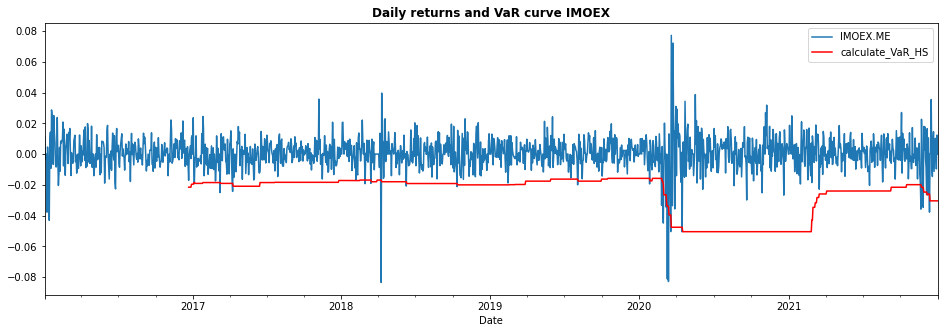

In [ ]:
fig = plt.figure(figsize=(16, 5))

df_risk_factors_returns['IMOEX.ME'].plot()
(-VaR_HS_IMOEX).plot(color="r")

plt.title("Daily returns and VaR curve IMOEX", weight="bold")
plt.legend()
plt.show()

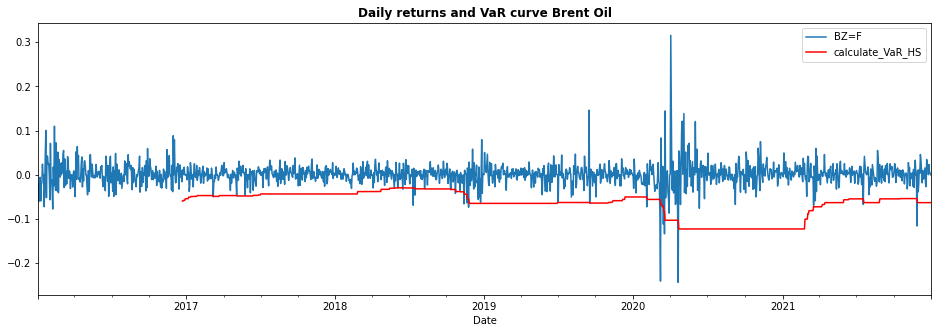

In [ ]:
fig = plt.figure(figsize=(16, 5))

df_risk_factors_returns['BZ=F'].plot()
(-VaR_HS_BZ).plot(color="r")

plt.title("Daily returns and VaR curve Brent Oil", weight="bold")
plt.legend()
plt.show()

### Parametric risk factor model
Now let's look at the VaR values ​​according to the parametric model of the risk factor

In [ ]:
import scipy.stats as ss

In [ ]:
def calculate_VaR_normal(returns, alpha):
    mu, std = ss.norm.fit(returns)
    return - ss.norm.ppf(1 - alpha, mu, std)


VaR_norm_IMOEX = calc_VaR(df_risk_factors_returns['IMOEX.ME'], calculate_VaR_normal, 252, alpha)
VaR_norm_IMOEX

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.023193
2021-12-28    0.023196
2021-12-29    0.023024
2021-12-30    0.023114
2021-12-31    0.023113
Freq: B, Name: calculate_VaR_normal, Length: 1564, dtype: float64

In [ ]:
VaR_norm_EURRUB = calc_VaR(df_risk_factors_returns['USDRUB=X'], calculate_VaR_normal, 252, alpha)
VaR_norm_EURRUB

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.013736
2021-12-28    0.013730
2021-12-29    0.013743
2021-12-30    0.013725
2021-12-31    0.013727
Freq: B, Name: calculate_VaR_normal, Length: 1564, dtype: float64

In [ ]:
VaR_norm_BZ = calc_VaR(df_risk_factors_returns['BZ=F'], calculate_VaR_normal, 252, alpha)
VaR_norm_BZ

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.044670
2021-12-28    0.044689
2021-12-29    0.044609
2021-12-30    0.044559
2021-12-31    0.044568
Freq: B, Name: calculate_VaR_normal, Length: 1564, dtype: float64

In [ ]:
import tqdm
def calculate_VaR_parametric(returns, alpha, family=ss.norm):
    params = family.fit(returns)
    return -family.ppf(1 - alpha, *params)

In [ ]:
VaR_t_IMOEX = calc_VaR(df_risk_factors_returns['IMOEX.ME'], calculate_VaR_parametric, 
                        252, alpha, family=ss.t, progress=tqdm.tqdm)
VaR_t_IMOEX

100%|██████████| 1312/1312 [01:04<00:00, 20.33it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.025932
2021-12-28    0.025833
2021-12-29    0.025462
2021-12-30    0.025524
2021-12-31    0.025443
Freq: B, Name: calculate_VaR_parametric, Length: 1564, dtype: float64

In [ ]:
VaR_t_USDRUB = calc_VaR(df_risk_factors_returns['USDRUB=X'], calculate_VaR_parametric, 
                        252, alpha, family=ss.t, progress=tqdm.tqdm)
VaR_t_USDRUB

100%|██████████| 1312/1312 [00:59<00:00, 21.93it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.015529
2021-12-28    0.015471
2021-12-29    0.015543
2021-12-30    0.015479
2021-12-31    0.015466
Freq: B, Name: calculate_VaR_parametric, Length: 1564, dtype: float64

In [ ]:
VaR_t_BZ = calc_VaR(df_risk_factors_returns['BZ=F'], calculate_VaR_parametric, 
                    252, alpha, family=ss.t, progress=tqdm.tqdm)
VaR_t_BZ

100%|██████████| 1312/1312 [00:54<00:00, 24.05it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.053069
2021-12-28    0.052719
2021-12-29    0.052918
2021-12-30    0.053035
2021-12-31    0.053366
Freq: B, Name: calculate_VaR_parametric, Length: 1564, dtype: float64

In [ ]:
# Use the GARCH model to take the volatility into account

In [ ]:
!pip install arch --quiet

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import arch

In [ ]:
mdl_IMOEX = arch.arch_model(df_risk_factors_returns['IMOEX.ME'] * 100).fit()
forecast_IMOEX = mdl_IMOEX.forecast(reindex=False)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1684370216489.931
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6785928781.945846
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2413.037741189354
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2799.4553109305784
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2133.330500820065
Iteration:      6,   Func. Count:     42,   Neg. LLF: 2227.642453797901
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2133.05407195321
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2133.039019730423
Iteration:      9,   Func. Count:     58,   Neg. LLF: 2133.037286246861
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2133.0368200722864
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2133.0368195535657
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2133.0368195535657
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations:

In [ ]:
print(forecast_IMOEX.mean, forecast_IMOEX.variance)

                 h.1
Date                
2021-12-31  0.074253                 h.1
Date               
2021-12-31  1.38945


In [ ]:
# Now we can calculate the quantiles...
μ = forecast_IMOEX.mean.values.item()
σ = np.sqrt(forecast_IMOEX.variance.values.item())
q = ss.norm.ppf(1 - alpha)
VaR = - (μ + σ * q) / 100
print(VaR)

0.026679277304912596


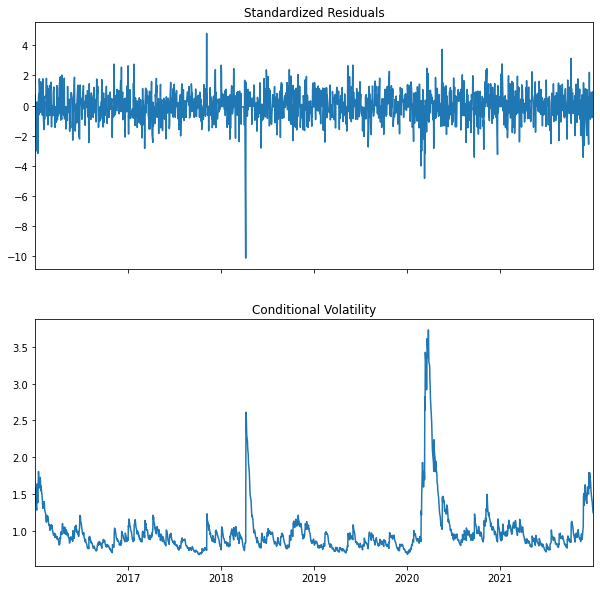

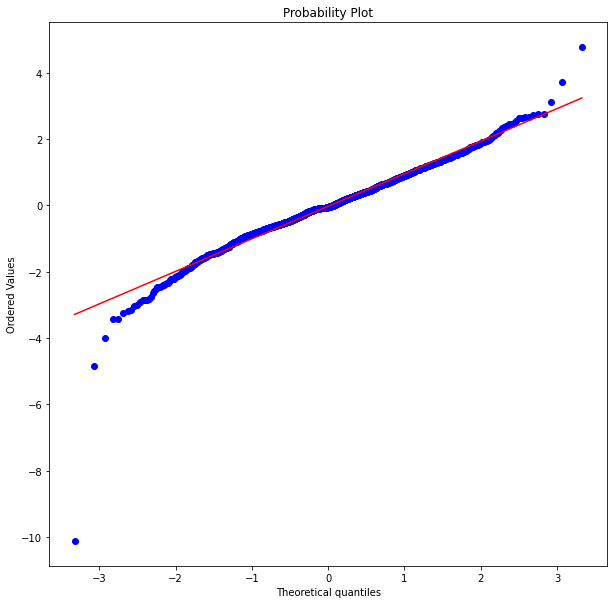

In [ ]:
mdl_IMOEX.plot()
plt.figure()
ss.probplot(mdl_IMOEX.std_resid, plot=plt);

Iteration:      1,   Func. Count:      7,   Neg. LLF: 8245.194655849746
Iteration:      2,   Func. Count:     17,   Neg. LLF: 90445.36233864725
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2444.713614726704
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2314.488545393805
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2664.0053149010782
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2075.3335988855256
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2067.6495720288576
Iteration:      8,   Func. Count:     64,   Neg. LLF: 2065.962032156878
Iteration:      9,   Func. Count:     70,   Neg. LLF: 2065.9503142242675
Iteration:     10,   Func. Count:     76,   Neg. LLF: 2065.9492885890613
Iteration:     11,   Func. Count:     82,   Neg. LLF: 2065.9492648146916
Iteration:     12,   Func. Count:     88,   Neg. LLF: 2065.949259381486
Iteration:     13,   Func. Count:     94,   Neg. LLF: 2065.9492563297435
Iteration:     14,   Func. Count:     99,   Neg. LLF: 206

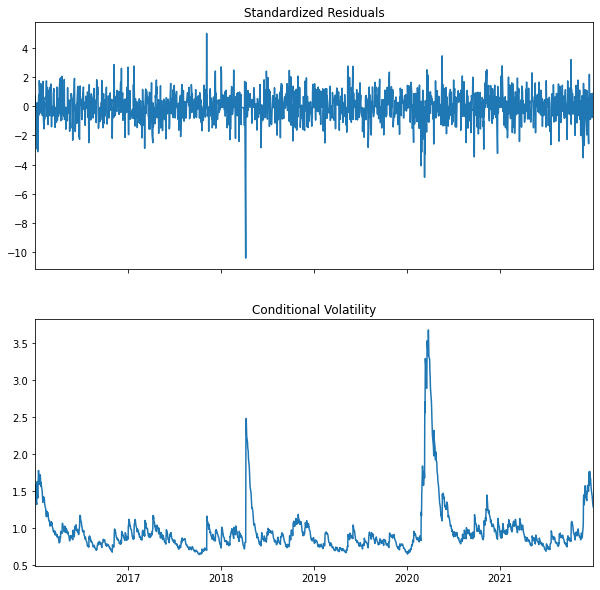

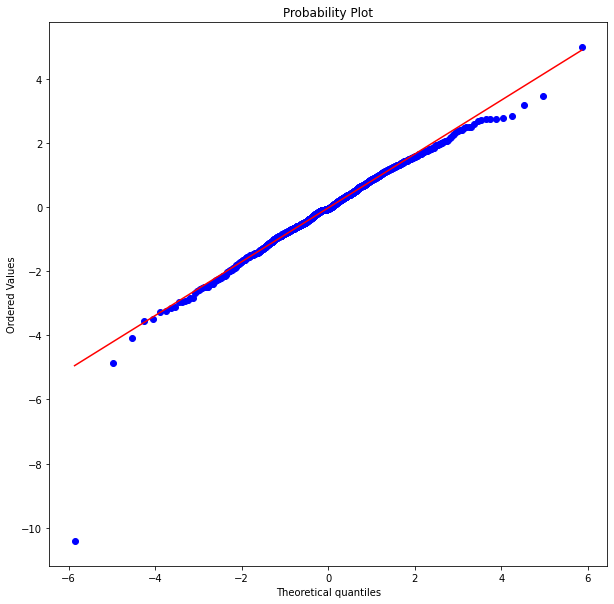

In [ ]:
# Take t-distribution for our model
mdl_IMOEX_t = arch.arch_model(df_risk_factors_returns['IMOEX.ME'] * 100, dist='t')
res = mdl_IMOEX_t.fit()
forecast = res.forecast(reindex=False)
print(res)
print(forecast.mean, forecast.variance)
res.plot()
plt.figure()
ss.probplot(res.std_resid, dist=ss.t(df=res.params['nu']), plot=plt);

In [ ]:
# it looks better

mdl_IMOEX_t.distribution

Standardized Student's t distribution, id: 0x7f4accd330d0

In [ ]:
# Now we can calculate the quantiles as before, but with a different distribution:
q = mdl_IMOEX_t.distribution.ppf(1 - alpha, res.params['nu'])
μ = forecast.mean.values.item()
σ = np.sqrt(forecast.variance.values.item())
VaR = - (μ + σ * q)
print(VaR)


3.0574413730586207


In [ ]:
print(mdl_IMOEX_t.distribution.parameter_names())
print(res.params)
#**res.params[mdl_IMOEX_t.distribution.parameter_names()]

['nu']
mu          0.075042
omega       0.037453
alpha[1]    0.071656
beta[1]     0.887534
nu          6.355770
Name: params, dtype: float64


In [ ]:
# This is the working version
def calculate_VaR_GARCH(returns, alpha, dist="normal"):
    mdl = arch.arch_model(returns * 100, dist=dist)
    res = mdl.fit(disp="off")
    forecast = res.forecast(reindex=False)
    p = []
    if len(mdl.distribution.parameter_names()) > 0:
        p.append(res.params[mdl.distribution.parameter_names()].values[0])
    q = mdl.distribution.ppf(1 - alpha, p)
    μ = forecast.mean.values.item()
    σ = np.sqrt(forecast.variance.values.item())
    VaR = - (μ + σ * q) / 100
    return VaR
    
calculate_VaR_GARCH(df_risk_factors_returns['IMOEX.ME'], alpha), calculate_VaR_GARCH(df_risk_factors_bonds_returns['IMOEX.ME'], alpha, "t")

In [ ]:
df_risk_factors_returns.columns

Index(['BZ=F', 'IMOEX.ME', 'USDRUB=X'], dtype='object')

In [ ]:
VaR_GARCH_IMOEX = calc_VaR(df_risk_factors_returns['IMOEX.ME'], calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="normal")
VaR_GARCH_IMOEX

100%|██████████| 1312/1312 [00:34<00:00, 38.51it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.036209
2021-12-28    0.034543
2021-12-29    0.032930
2021-12-30    0.031725
2021-12-31    0.030986
Freq: B, Name: calculate_VaR_GARCH, Length: 1564, dtype: float64

In [ ]:
VaR_GARCH_IMOEX_t = calc_VaR(df_risk_factors_returns['IMOEX.ME'], calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="t")
VaR_GARCH_IMOEX_t

100%|██████████| 1312/1312 [01:04<00:00, 20.42it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.039022
2021-12-28    0.037494
2021-12-29    0.036185
2021-12-30    0.035179
2021-12-31    0.034425
Freq: B, Name: calculate_VaR_GARCH, Length: 1564, dtype: float64

In [ ]:
VaR_GARCH_EURRUB = calc_VaR(df_risk_factors_returns['USDRUB=X'], calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="normal")
VaR_GARCH_EURRUB

100%|██████████| 1312/1312 [00:38<00:00, 34.50it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.011466
2021-12-28    0.011556
2021-12-29    0.011378
2021-12-30    0.011492
2021-12-31    0.011655
Freq: B, Name: calculate_VaR_GARCH, Length: 1564, dtype: float64

In [ ]:
VaR_GARCH_BZ = calc_VaR(df_risk_factors_returns['BZ=F'], calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="normal")
VaR_GARCH_BZ

100%|██████████| 1312/1312 [00:32<00:00, 39.82it/s]


Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2021-12-27    0.046175
2021-12-28    0.046028
2021-12-29    0.044410
2021-12-30    0.042350
2021-12-31    0.040849
Freq: B, Name: calculate_VaR_GARCH, Length: 1564, dtype: float64

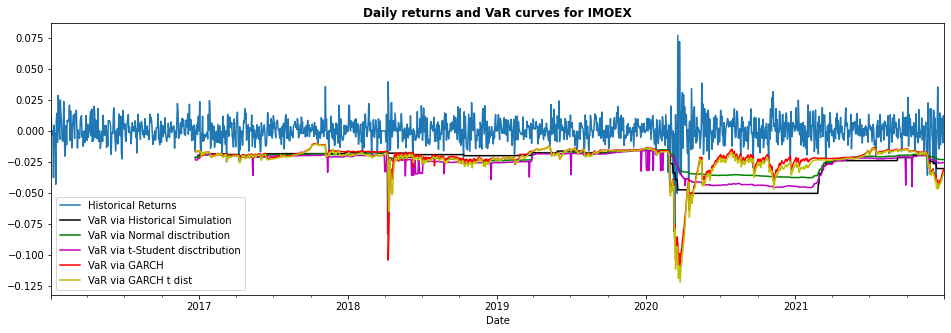

In [ ]:
fig = plt.figure(figsize=(16, 5))
df_risk_factors_returns['IMOEX.ME'].plot()
(-VaR_HS_IMOEX).plot(color="k")
(-VaR_norm_IMOEX).plot(color="g")
(-VaR_t_IMOEX).plot(color="m")
(-VaR_GARCH_IMOEX).plot(color="r")
(-VaR_GARCH_IMOEX_t).plot(color="y")
plt.title("Daily returns and VaR curves for IMOEX", weight="bold")
plt.legend(
    [
        "Historical Returns",
        "VaR via Historical Simulation",
        "VaR via Normal disctribution",
        "VaR via t-Student disctribution",
        "VaR via GARCH ",
        "VaR via GARCH t dist"
        ,
    ]
)
plt.show()

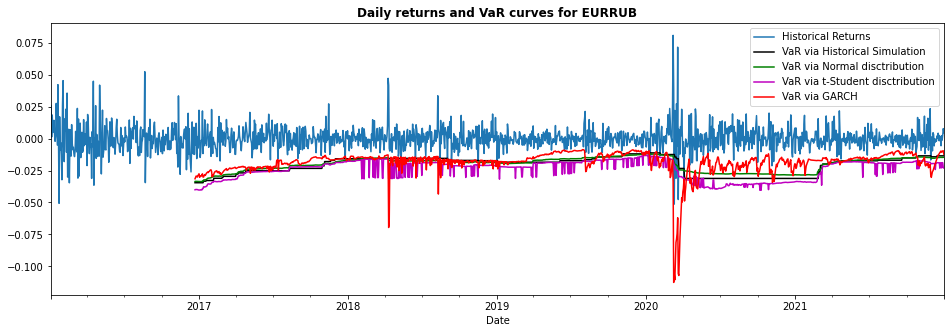

In [ ]:
fig = plt.figure(figsize=(16, 5))
returns_idx['EURRUB=X'].plot()
(-VaR_HS_EURRUB).plot(color="k")
(-VaR_norm_EURRUB).plot(color="g")
(-VaR_t_EURRUB).plot(color="m")
(-VaR_GARCH_EURRUB).plot(color="r")
plt.title("Daily returns and VaR curves for EURRUB", weight="bold")
plt.legend(
    [
        "Historical Returns",
        "VaR via Historical Simulation",
        "VaR via Normal disctribution",
        "VaR via t-Student disctribution",
        "VaR via GARCH",
    ]
)
plt.show()

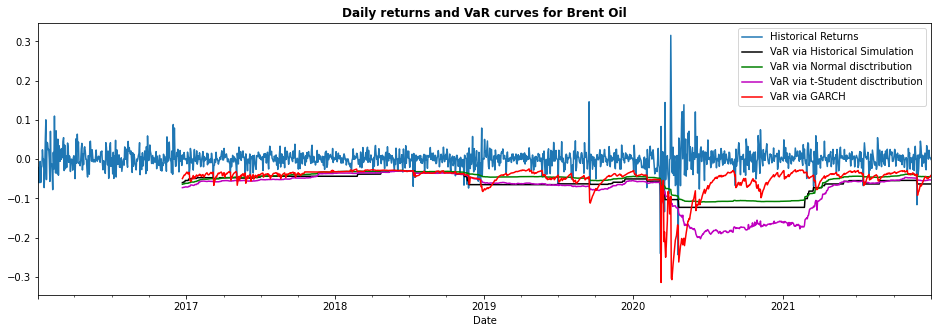

In [ ]:
fig = plt.figure(figsize=(16, 5))
returns_idx['BZ=F'].plot()
(-VaR_HS_BZ).plot(color="k")
(-VaR_norm_BZ).plot(color="g")
(-VaR_t_BZ).plot(color="m")
(-VaR_GARCH_BZ).plot(color="r")
plt.title("Daily returns and VaR curves for Brent Oil", weight="bold")
plt.legend(
    [
        "Historical Returns",
        "VaR via Historical Simulation",
        "VaR via Normal disctribution",
        "VaR via t-Student disctribution",
        "VaR via GARCH",
    ]
)
plt.show()

### Conclusions
After evaluating different models, we have found that the historical model provides a reasonable estimation of risks. Overall, this model tends to slightly overestimate the risks compared to the model with normal distribution parameters. However, it does not excessively overestimate the risks as often observed with the model utilizing the Student's t-distribution.

The historical model, despite its slight overestimation, offers a balanced approach in capturing the underlying risk factors and providing a reliable assessment of the portfolio's risk. While it may be conservative in some cases, it helps mitigate the potential impact of extreme events and uncertainties, contributing to a more robust risk management framework.

By considering the strengths and limitations of different models, we can make informed decisions about risk assessment and enhance our understanding of the potential risks associated with the portfolio.

## Repeat for the bonds

In [ ]:
VaR_HS_period5 = calc_VaR(df_risk_factors_bonds_returns['period_5.0'], calculate_VaR_HS, 252, alpha)


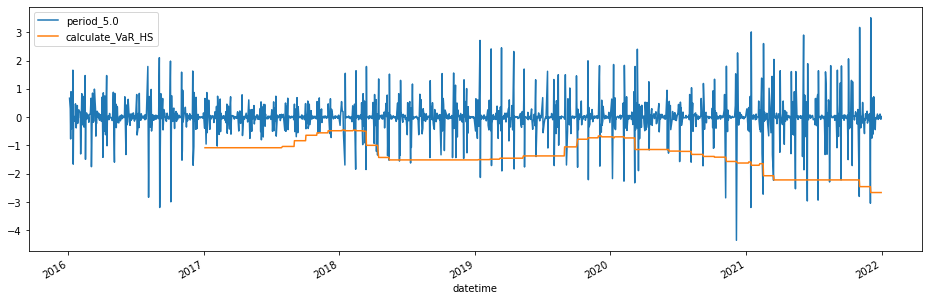

In [ ]:
fig = plt.figure(figsize=(16, 5))
VaR_lower = calc_VaR(df_risk_factors_bonds['period_5.0'].diff(), calculate_VaR_HS, 252, alpha)

df_risk_factors_bonds_returns['period_5.0'].diff().plot()
(-VaR_lower).plot()
plt.legend()

In [ ]:
VaR_HS_period5 = calculate_VaR_HS(df_risk_factors_bonds['period_5.0'].diff().dropna(), alpha)


In [ ]:
VaR_norm_period5 = calc_VaR(df_risk_factors_bonds['period_5.0'].diff().dropna(), calculate_VaR_normal, 252, alpha)

In [ ]:
VaR_GARCH_period5 = calc_VaR(df_risk_factors_bonds['period_5.0'].diff().dropna(), calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="normal")


100%|██████████| 1262/1262 [00:40<00:00, 31.11it/s]


In [ ]:
VaR_t_period5 = calc_VaR(df_risk_factors_bonds['period_5.0'].diff().dropna(), calculate_VaR_parametric, 
                        252, alpha, family=ss.t, progress=tqdm.tqdm)

100%|██████████| 1262/1262 [00:36<00:00, 34.80it/s]


In [ ]:
VaR_GARCH_period5_t = calc_VaR(df_risk_factors_bonds['period_5.0'].diff().dropna(), calculate_VaR_GARCH, 252, alpha, progress=tqdm.tqdm, dist="t")


100%|██████████| 1262/1262 [02:08<00:00,  9.86it/s]


In [ ]:
fig = plt.figure(figsize=(16, 5))
VaR_lower = calc_VaR(df_risk_factors_bonds_returns['period_5.0'].diff(), calculate_VaR_HS, 252, alpha)


df_risk_factors_bonds_returns['period_5.0'].diff().plot()
(-VaR_HS_period5).plot()
#(-VaR_norm_period5).plot(color="g")
#(-VaR_GARCH_period5).plot(color="r")
#(-VaR_t_period5).plot(color="m")

plt.legend()

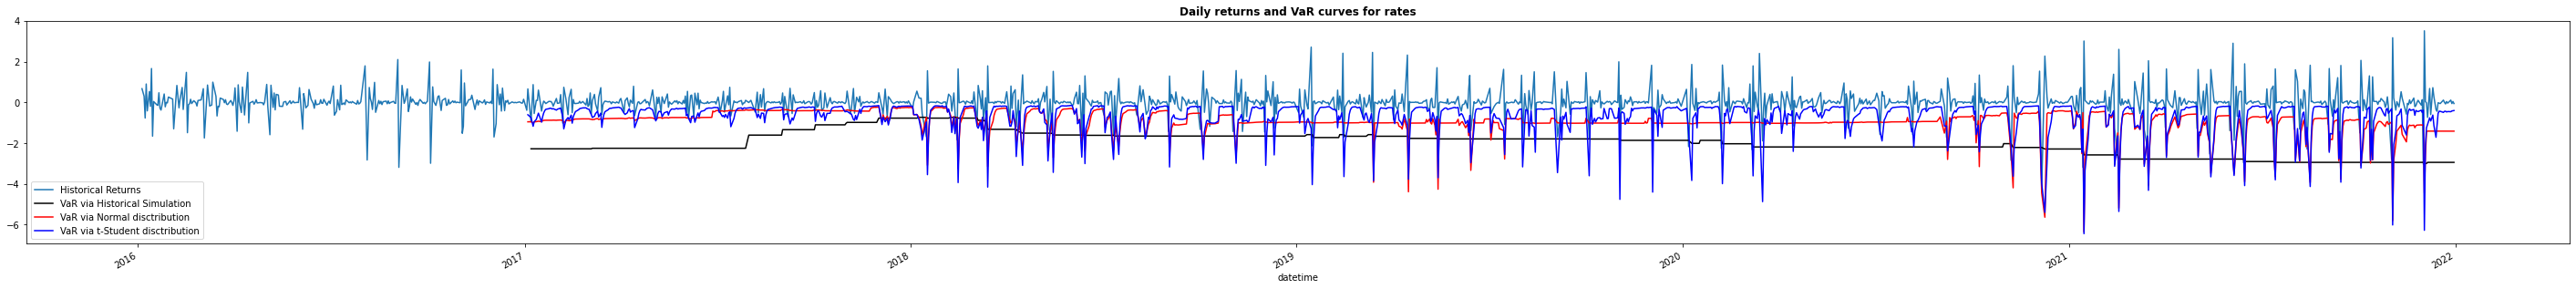

In [ ]:
fig = plt.figure(figsize=(16, 5))
df_risk_factors_bonds_returns['period_5.0'].diff().plot()
(-VaR_lower).plot(color="k")
#(-VaR_norm_period5).plot(color="g")
(-VaR_t_period5).plot(color="m")
(-VaR_GARCH_period5).plot(color="r")
(-VaR_GARCH_period5_t).plot(color="b")
plt.title("Daily returns and VaR curves for rates", weight="bold")
plt.legend(
    [
        "Historical Returns",
        "VaR via Historical Simulation",
        "VaR via Normal disctribution",
        "VaR via t-Student disctribution",
        "VaR via GARCH",
    ]
)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f6ae8c7-7661-4f9b-91a6-1bc36c189c78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>